Notbook to explore the data I will use in my project

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import os

In [3]:
#install kaggle api to use datasets from there
!pip install kaggle


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   38G   71G  35% /


In [5]:
    import os
    os.environ['KAGGLE_CONFIG_DIR'] = "/content"

    !kaggle datasets download -d michaelkloster/ude-diatoms-in-the-wild-2024

Dataset URL: https://www.kaggle.com/datasets/michaelkloster/ude-diatoms-in-the-wild-2024
License(s): CC0-1.0
100% 4.60G/4.63G [01:53<00:00, 36.1MB/s]
100% 4.63G/4.63G [01:53<00:00, 43.8MB/s]


In [18]:
#unzip the dataset to work with it
!unzip /content/ude-diatoms-in-the-wild-2024.zip

Archive:  /content/ude-diatoms-in-the-wild-2024.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Dataset overview

The dataset is split into three subsets each with their own test/trainig/validattion data.

The subsets are:


*   Subset_n100 --> in this subset all diatom species are represented by at least 100 samples
* Subset_n50 --> in this subset all diatom species are represented by at least 50 samples
* Subset_n25 --> here all diatom species are represented by at least 25 samples




In [30]:
#look at the CSV of the n_100 dataset
df_100_test = pd.read_csv('/content/UDE Diatoms in the Wild 2024-Subset_n100/UDE Diatoms in the Wild 2024-Subset_n100/UDE_Diatoms_in_the_Wild_2024.subset_n100_test.csv')
df_100_train = pd.read_csv('/content/UDE Diatoms in the Wild 2024-Subset_n100/UDE Diatoms in the Wild 2024-Subset_n100/UDE_Diatoms_in_the_Wild_2024.subset_n100_train.csv')
df_100_val = pd.read_csv('/content/UDE Diatoms in the Wild 2024-Subset_n100/UDE Diatoms in the Wild 2024-Subset_n100/UDE_Diatoms_in_the_Wild_2024.subset_n100_val.csv')

#merge the dataframes into one
#add a source column to each df
#df_100_test['source'] = 'test'
#df_100_train['source'] = 'train'
#df_100_val['source'] = 'val'
df_100 = pd.concat([df_100_test, df_100_train, df_100_val])

#get number of samples and number of features in this subset
# Number of samples
num_samples = df_100.shape[0]

# Number of features
num_features = df_100.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df_100.head())


Number of samples: 67594
Number of features: 16
Example data:
   annotation_id                     type          genus  \
0       12257424           6 - Monoraphid  Achnanthidium   
1       12260260   4 - Symmetric biraphid       Navicula   
2       12260263           6 - Monoraphid  Achnanthidium   
3       12260265           6 - Monoraphid  Achnanthidium   
4       12260273  5 - Asymmetric biraphid    Gomphonella   

                      species subspecies    annotator  bbox_x0  bbox_y0  \
0  Achnanthidium minutissimum        NaN  Annotator 2    27953    14340   
1         Navicula lanceolata        NaN  Annotator 2    10470     2465   
2  Achnanthidium minutissimum        NaN  Annotator 2    11430     1289   
3  Achnanthidium minutissimum        NaN  Annotator 2    11269      750   
4        Gomphonella olivacea        NaN  Annotator 2    14032     1318   

   bbox_x1  bbox_y1    shape  \
0    28114    14450  Polygon   
1    10940     2848  Polygon   
2    11548     1433  Polygon  

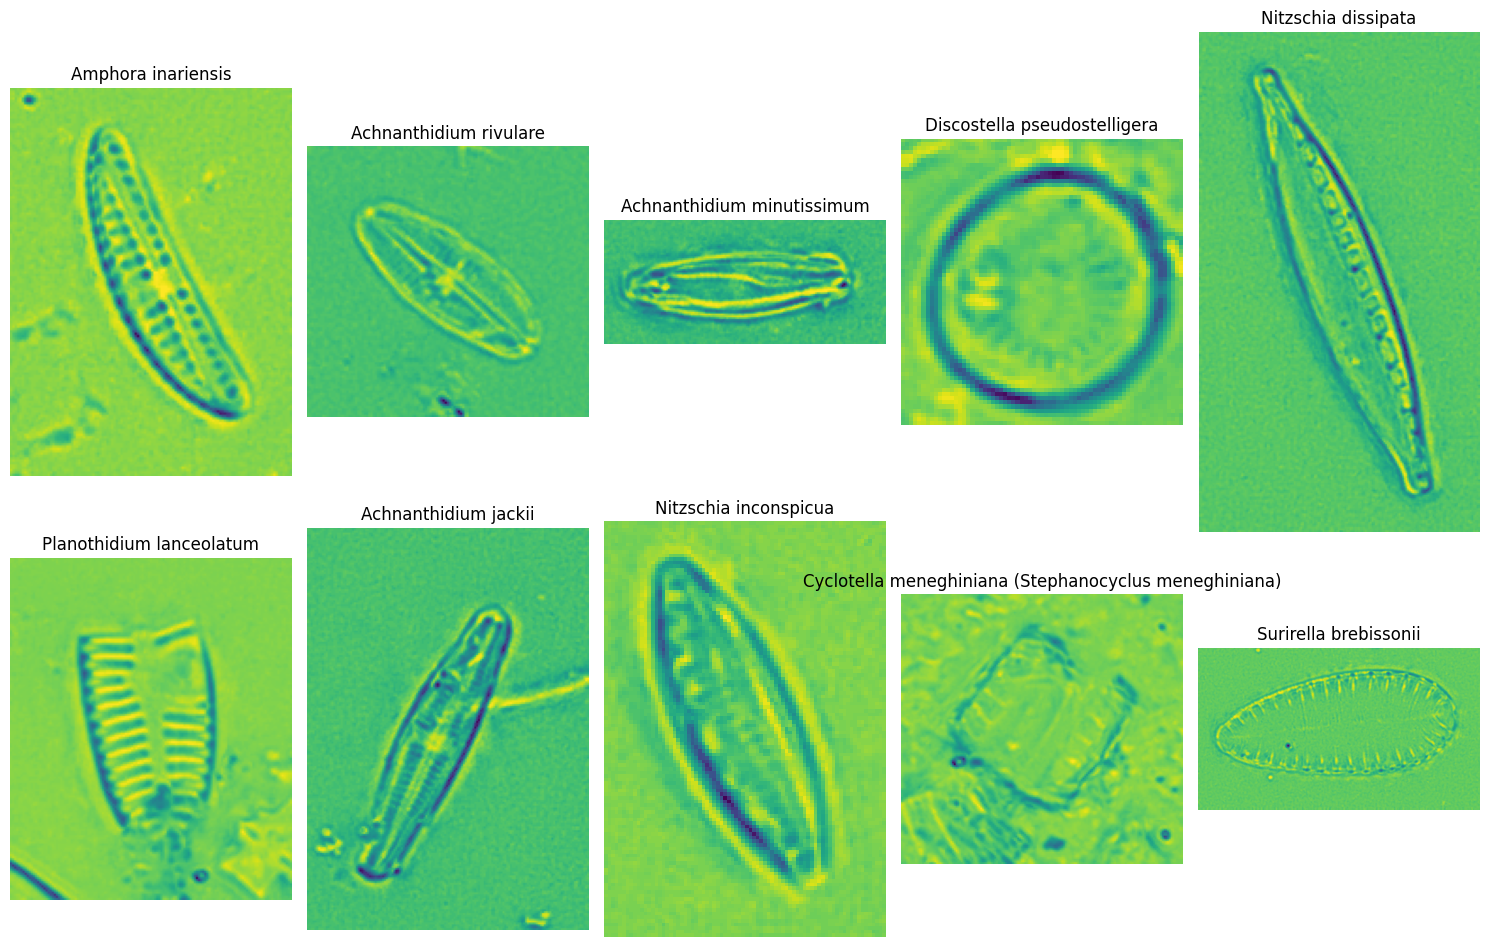

In [40]:
#print some images from the test data to see what they look like
# Make sure you have df_100_train loaded from the CSV
# If not, load it:
# df_100_train = pd.read_csv('/content/UDE Diatoms in the Wild 2024-Subset_n100/UDE Diatoms in the Wild 2024-Subset_n100/UDE_Diatoms_in_the_Wild_2024.subset_n100_train.csv')

# Get the directory path for the training images
# You need to verify this path based on your dataset structure
train_images_dir = '/content/UDE Diatoms in the Wild 2024-Subset_n100/UDE Diatoms in the Wild 2024-Subset_n100/train/'


# Select 10 random rows from the DataFrame
import random
random_samples = df_100_train.sample(n=10)

# Display the images
plt.figure(figsize=(15, 10))
for i, (index, row) in enumerate(random_samples.iterrows()):
    # Get the species name and filename from the selected row
    species_name = row['species']
    filename = row['cutout_filename']

    # Construct the full image path including the species subfolder
    img_path = os.path.join(train_images_dir, species_name, filename)

    # Read the image
    img = mpimg.imread(img_path)

    # Display the image
    plt.subplot(2, 5, i + 1) # Arrange in a 2x5 grid
    plt.imshow(img)
    plt.title(f"{species_name}") # Display species name as title
    plt.axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles/images
plt.show()



# Missing Values

My dataset only has missing values in the subspecies feature. This does ont bother me as I want to classify my diatoms on species level and not further. Thus I can ignore the missing values

In [31]:
#check if there are any missing values in my dataset
# Check for missing values
missing_values = df_100.isnull().sum()
missing_values

#there are missing values in the subspecies festure. This is however not so important
#as my goal is to only identify the diatoms down to the species level

,0
annotation_id,0
type,0
genus,0
species,0
subspecies,63236
annotator,0
bbox_x0,0
bbox_y0,0
bbox_x1,0
bbox_y1,0


# Feature distribution & possible biases

The species bar chart shows that the distribution of the samples is very different over the species. Some especially one is really overrepresentes while others seem to just reach the minimum number of 100 samples

Looking at wich annotator has the most annotations is clear, that annotator 1 has annotated the most samples in this dataset --> this could cause a human bias in the data if he/she would tend to make a reoccuring error in e.g. wrongly annotating one species

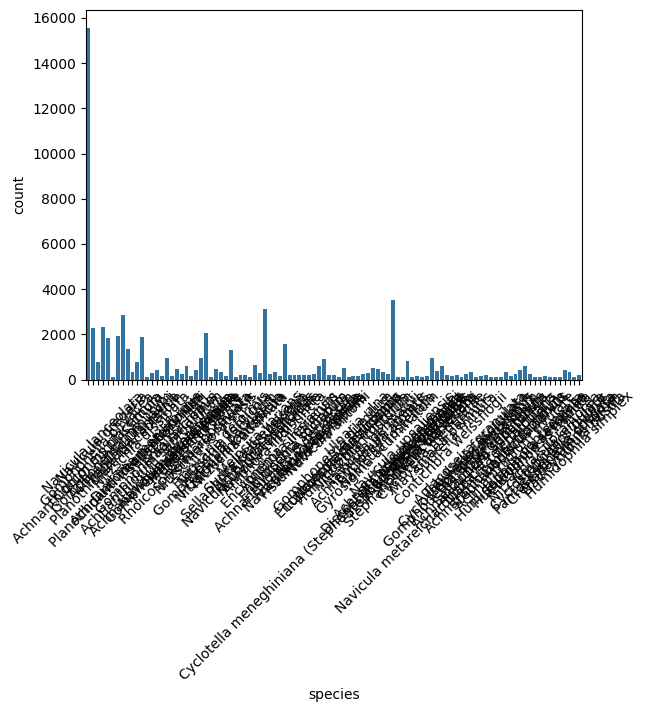

In [45]:
sns.countplot(data=df_100, x='species')  # z. B. für ein Merkmal wie "Geschlecht"
#rotate x axis lables
plt.xticks(rotation=45)
plt.show()

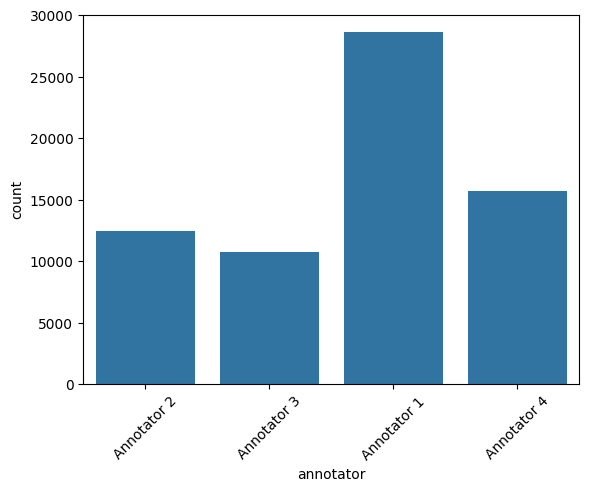

In [49]:
sns.countplot(data=df_100, x='annotator')  # z. B. für ein Merkmal wie "Geschlecht"
#rotate x axis lables
plt.xticks(rotation=45)
plt.show()

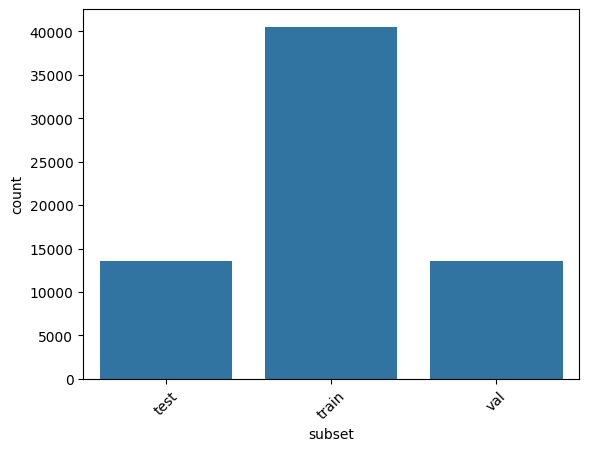

In [51]:
sns.countplot(data=df_100, x='subset')  # z. B. für ein Merkmal wie "Geschlecht"
#rotate x axis lables
plt.xticks(rotation=45)
plt.show()


# Correlations

As I have barely any numerical features the simple correlation matrix does not work for me.
I thus went with crosstabulation. I had however the problem as the overrepresentation of some species influences ths. So I had to display proportions

Crosstabulation of species and annotator:
annotator                  Annotator 1  Annotator 2  Annotator 3  Annotator 4
species                                                                      
Achnanthidium atomoides              0          672           10          116
Achnanthidium delmontii             57           28            0           27
Achnanthidium eutrophilum           25           81            3           24
Achnanthidium jackii               925          313          228         1409
Achnanthidium lineare                0          170           50           60
...                                ...          ...          ...          ...
Stephanodiscus parvus              165            0            0            0
Surirella brebissonii              132           13          369          149
Surirella minuta                   208            1            3            4
Tabularia fasciculata               89            5            0           30
Ulnaria ulna          

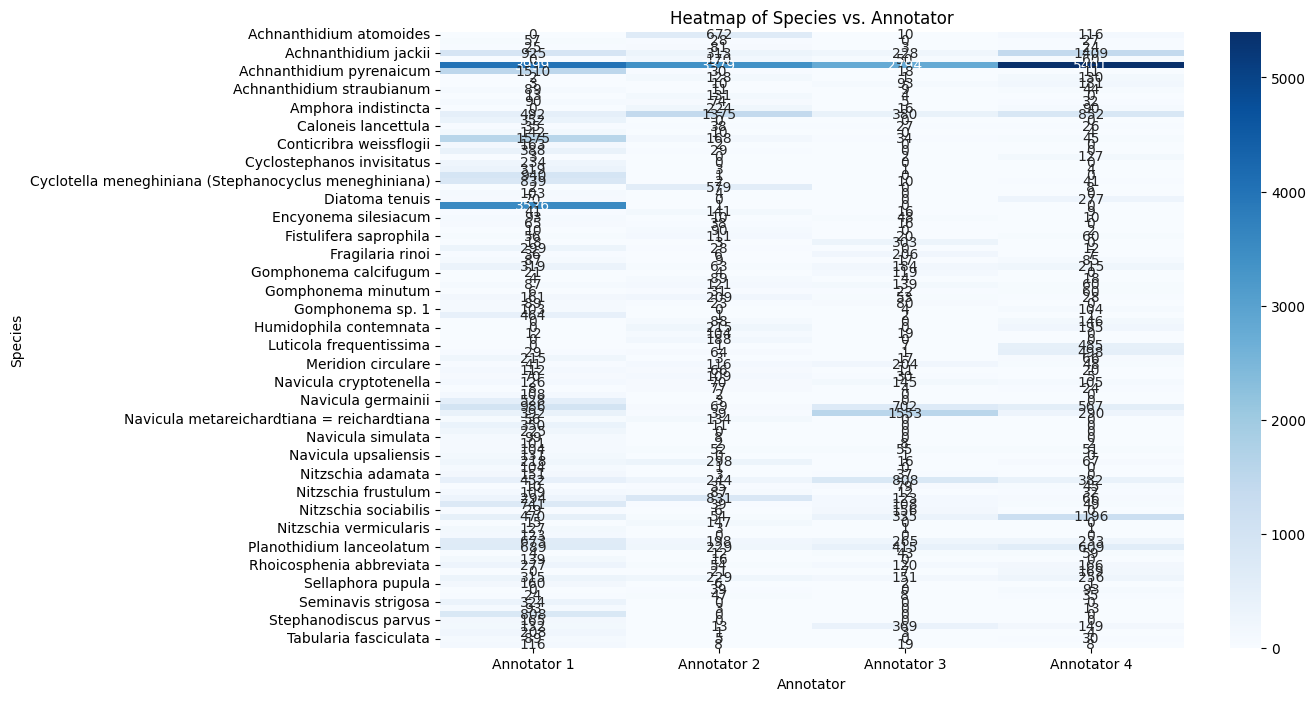

In [55]:
# Crosstabulation
crosstab_species_annotator = pd.crosstab(df_100['species'], df_100['annotator'])
print("Crosstabulation of species and annotator:")
print(crosstab_species_annotator)

# Crosstabulation of species and annotator (as you already have)
crosstab_species_annotator = pd.crosstab(df_100['species'], df_100['annotator'])

# Create a heatmap
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.heatmap(crosstab_species_annotator, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Species vs. Annotator')
plt.xlabel('Annotator')
plt.ylabel('Species')
plt.show()




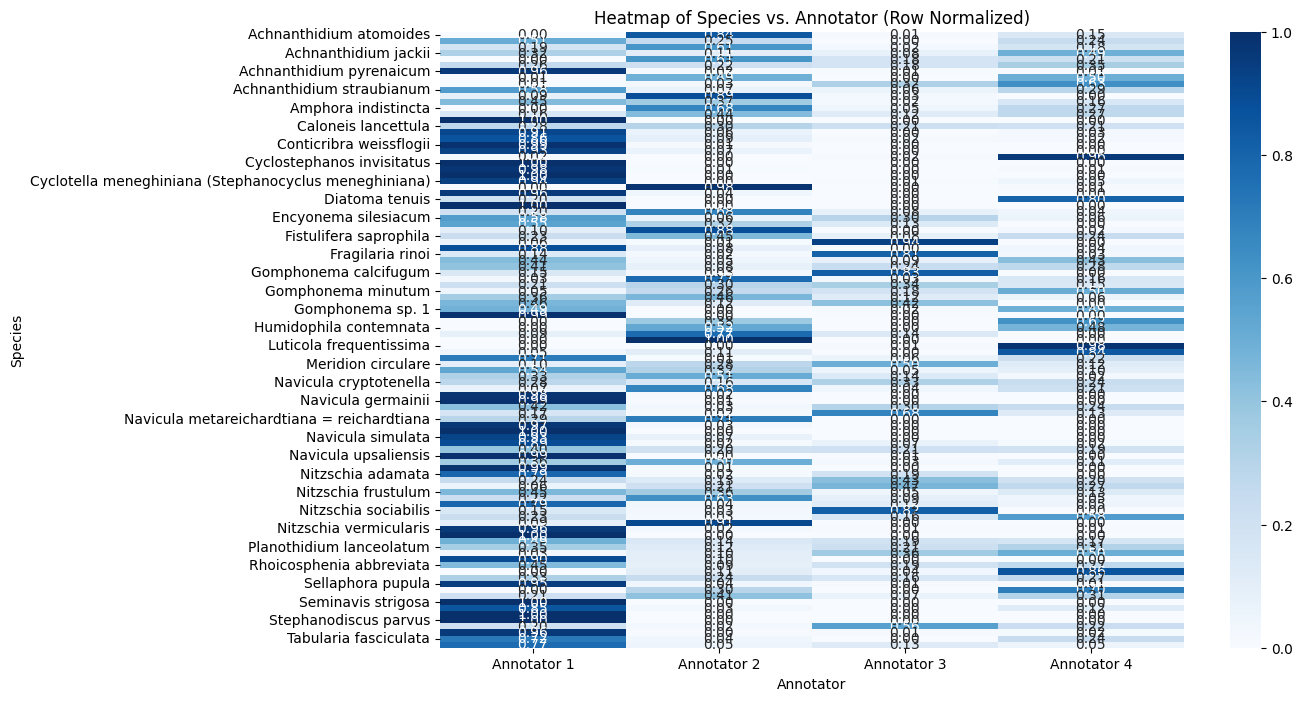

In [57]:
# Standardize by row (percentage of annotations per species)
crosstab_species_annotator_row_normalized = pd.crosstab(df_100['species'], df_100['annotator'], normalize='index')

# Create a heatmap of row-normalized data
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_species_annotator_row_normalized, annot=True, fmt='.2f', cmap='Blues') # fmt='.2f' for two decimal places
plt.title('Heatmap of Species vs. Annotator (Row Normalized)')
plt.xlabel('Annotator')
plt.ylabel('Species')
plt.show()


